In [1]:
import pandas as pd
import geopandas as gpd
from itertools import chain
import numpy as np

In [2]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [3]:
wgi = pd.read_excel('wgidataset.xlsx')

In [4]:
mapa = gpd.read_file('ne_110m_admin_0_countries')

In [5]:
wgi = wgi.loc[(wgi['year'] == 2023) & (wgi['indicator'] == 'va')].reset_index(drop=True).iloc[:, chain(range(2, 5), [8])]

In [6]:
wgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   countryname  214 non-null    object
 1   year         214 non-null    int64 
 2   indicator    214 non-null    object
 3   pctrank      214 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.8+ KB


In [7]:
wgi = wgi.iloc[:, [0, 2, 3]]

In [8]:
wgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   countryname  214 non-null    object
 1   indicator    214 non-null    object
 2   pctrank      214 non-null    object
dtypes: object(3)
memory usage: 5.1+ KB


In [9]:
wgi['countryname'].value_counts().sum()

np.int64(214)

In [10]:
egdi['Country Name'].value_counts().sum()

np.int64(193)

In [11]:
set(egdi['Country Name']).difference(wgi['countryname'])

{'Bahamas',
 'Cabo Verde',
 'Congo',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Egypt',
 'Gambia',
 'Georgia (Country)',
 'Iran (Islamic Republic of)',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Slovakia',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela',
 'Yemen'}

In [12]:
wgi['countryname'] = wgi['countryname'].replace({
    'Georgia': 'Georgia (Country)',
    'Bahamas, The': 'Bahamas',
    'Gambia, The': 'Gambia',
    'Lao PDR': "Lao People's Democratic Republic",
    'Cape Verde': 'Cabo Verde',
    'Korea, Rep.': 'Republic of Korea',
    'Moldova': 'Republic of Moldova',
    'Slovak Republic': 'Slovakia',
    'Venezuela, RB': 'Venezuela',
    'Congo, Rep.': 'Congo',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Yemen, Rep.': 'Yemen',
    'Micronesia, Fed. Sts.': 'Micronesia (Federated States of)',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Tanzania':  'United Republic of Tanzania',
    'United States': 'United States of America',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Egypt, Arab Rep.': 'Egypt',
    "Korea, Dem. Rep.": "Democratic People's Republic of Korea",
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Iran, Islamic Rep.': 'Iran (Islamic Republic of)',
    'São Tomé and Principe': 'Sao Tome and Principe'
})

In [13]:
set(egdi['Country Name']).difference(wgi['countryname'])

set()

In [14]:
mapa['SOVEREIGNT'].value_counts().sum()

np.int64(177)

In [15]:
set(mapa['SOVEREIGNT']).difference(egdi['Country Name'])

{'Antarctica',
 'Brunei',
 'Czechia',
 'East Timor',
 'Georgia',
 'Iran',
 'Ivory Coast',
 'Kosovo',
 'Laos',
 'Moldova',
 'North Korea',
 'Northern Cyprus',
 'Republic of Serbia',
 'Republic of the Congo',
 'Russia',
 'Somaliland',
 'South Korea',
 'Syria',
 'Taiwan',
 'The Bahamas',
 'Turkey',
 'United Kingdom',
 'Vietnam',
 'Western Sahara',
 'eSwatini'}

In [16]:
mapa['SOVEREIGNT'] = mapa['SOVEREIGNT'].replace({
    'eSwatini': 'Eswatini', 
    'Iran': 'Iran (Islamic Republic of)',
    'Georgia': 'Georgia (Country)',
    'Ivory Coast': "Côte d'Ivoire",
    'East Timor': 'Timor-Leste',
    'Laos': 'Lao People\'s Democratic Republic',
    'Czechia': 'Czech Republic',
    'Republic of Serbia': 'Serbia',
    'Republic of the Congo': 'Congo',
    'Russia': 'Russian Federation',
    'Brunei': 'Brunei Darussalam',
    'Moldova': 'Republic of Moldova',
    'South Korea': 'Republic of Korea',
    "North Korea": "Democratic People's Republic of Korea",
    'Syria': 'Syrian Arab Republic',
    'The Bahamas': 'Bahamas',
    'Turkey': 'Türkiye',
    'Vietnam': 'Viet Nam',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland'
})

In [17]:
set(mapa['SOVEREIGNT']).difference(egdi['Country Name'])

{'Antarctica',
 'Kosovo',
 'Northern Cyprus',
 'Somaliland',
 'Taiwan',
 'Western Sahara'}

In [18]:
wgi = wgi.replace({
    '..': np.nan
})

C:\Users\lazar\AppData\Local\Temp\ipykernel_10964\135315054.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wgi = wgi.replace({


In [19]:
df = mapa.merge(wgi, left_on ='SOVEREIGNT', right_on='countryname')

In [20]:
df = gpd.GeoDataFrame(df)

In [21]:
df.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,countryname,indicator,pctrank
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,va,54.411766
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",United Republic of Tanzania,va,32.843136
2,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,va,95.098038
3,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",United States of America,va,75.490196
4,Admin-0 country,1,3,Kazakhstan,KA1,1,1,Sovereignty,1,Kazakhstan,...,None,None,None,None,None,None,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,va,21.568628


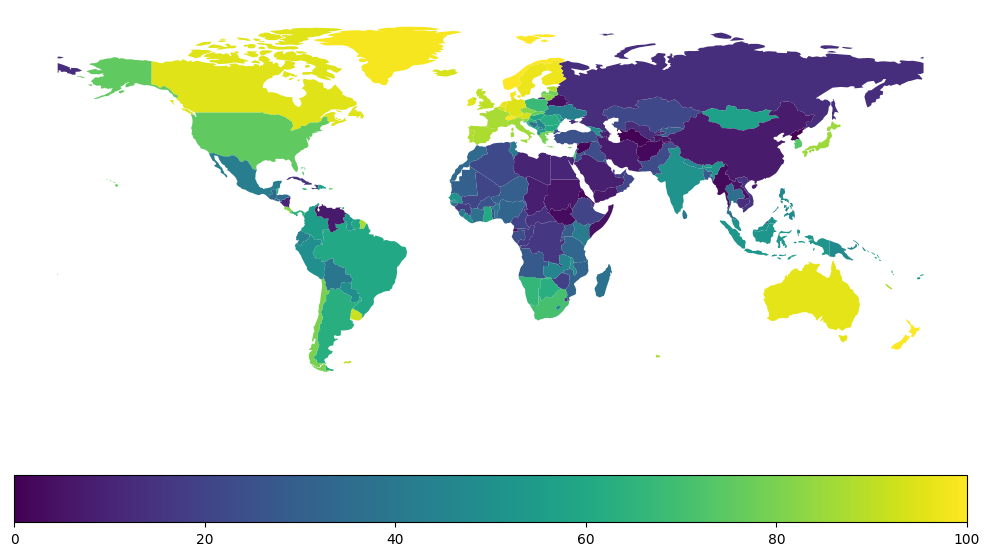

In [22]:
ax = df.plot(
    column='pctrank',
    figsize=(10, 6),
    legend=True,
    legend_kwds={
        'orientation': 'horizontal'
    },
    vmin=0,
    vmax=100
)

ax.axis('off')

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/mapa_coropleticos_wgi_va.png', dpi=300, bbox_inches='tight')